# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

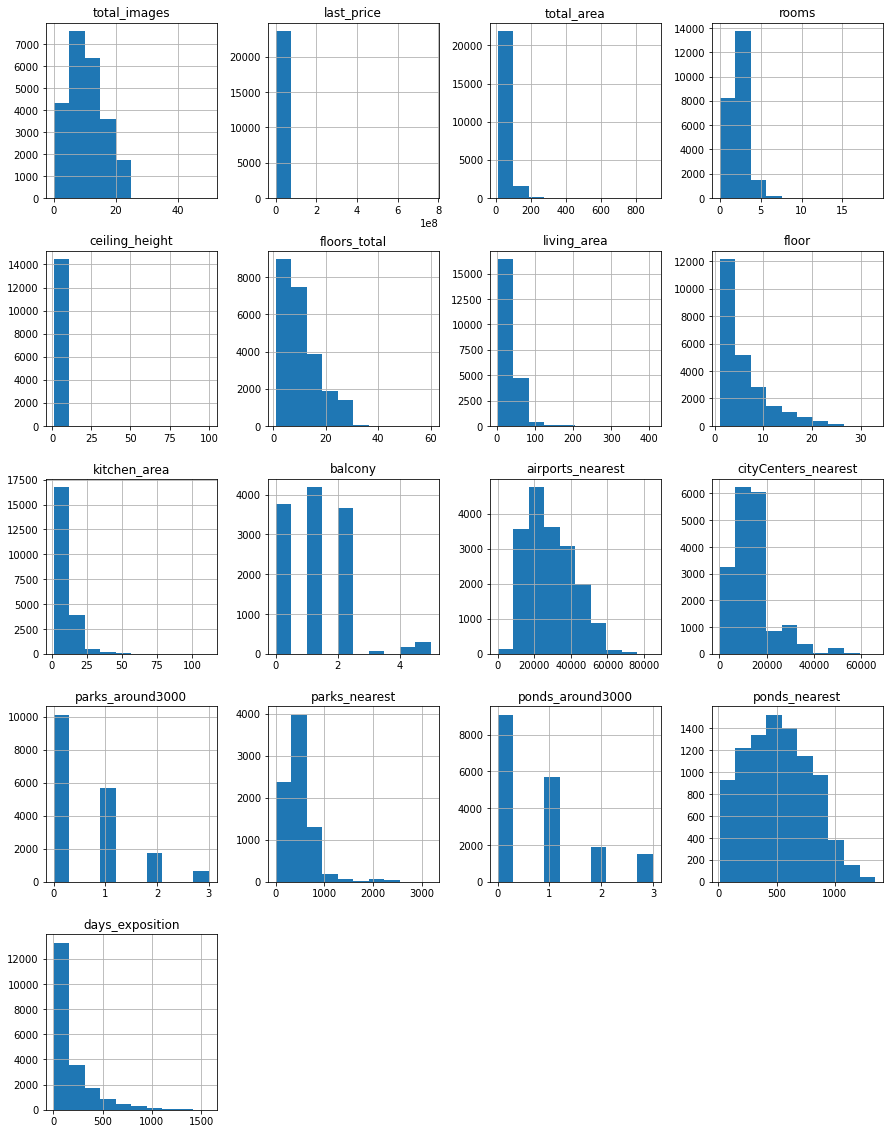

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
display(data.info())
display(data.hist(figsize=(15, 20)))

### Предобработка данных

In [233]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Причин для появления пропусков может быть несколько: 1)продавец не указал какие-нибудь сведения, потому что не знает их, например, высоту от пола до потолка, название территории, в которой расположена недвижимость, названия близлежащих аэропортов 2)автоматизированная система сбора информации дала сбой, 3) пропуски были оставлены умышленно, рассчитывая на автозаполнение спецсимволами

Заполним те пропуски, которые можно заполнить, проходясь по каждому столбцу в списке. 

# floors_total #

In [234]:
print(round(data['floors_total'].isnull().sum()/data['floors_total'].sum()*100,1)) #объявлений, где не заполнено количество этажей в доме, меньше одного процента, поэтому можно удалить их из массива данных
data.dropna(subset = ['floors_total'], inplace = True)


0.0


# ceiling_height #

Чаще всего высота потолка зависит от количества этажей в доме, где расположена квартира, и района. Поэтому мы найдем медианное значение высот потолков по району и количеству этажей и полученными значениями заполним пропуски:
- Сгруппируем значения высот потолков по району и количеству этажей и найдем медиану
- Заполним пропуски полученным значением
- Незаполненные пропуски заполним медианой высоты потолка по всему ряду значений

In [235]:
ceiling_median = data.groupby(['floors_total', 'locality_name'])['ceiling_height'].median()
for index, row in data.iterrows():
    if np.isnan(row['ceiling_height']) and pd.notna(row['locality_name']):  
        height = ceiling_median[row['floors_total'], row['locality_name']]
        if pd.notna(height): 
            data.loc[index,'ceiling_height'] = height
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

# living_area # 

Жилая площадь зависит от общей площади квартиры, поэтому заполнять пропущенные значения можно следующим образом:
- Сгруппируем значения жилой площади по значениям общей площади квартиры и найдем медиану 
- Значения, для которых не были найдены "пары" среди значений общей площади, заполним медианным значением по всему массиву данных среди жилых площадей

In [236]:
living_median = data.groupby('total_area')['living_area'].median()
for index, row in data.iterrows():
    if np.isnan(row['living_area']): 
        live = living_median[row['total_area']]
        if pd.notna(live): 
            data.loc[index,'living_area'] = live
living_all_median_part = (data['living_area'] / data['total_area']).median()
data.loc[data['living_area'].isna(), 'living_area'] = living_all_median_part*data['total_area']


# is_apartment #

In [237]:
print(data["is_apartment"].isna().sum()/len(data["is_apartment"]))


0.8824799898361072


В столбце "is_apartment" пропущенных значений много (~88%). Скорее всего, пропуски соответствуют информации о том, что недвижимость не является апартаментами. Поэтому такие пропуски были заполнены значением 'False'.

In [238]:
data['is_apartment'] = data['is_apartment'].fillna(False)

# balcony #

In [239]:
print(data["balcony"].isna().sum()/len(data["balcony"]))

0.48617287087621225


В столбце "balcony" пропущенных значений много (~48%). Скорее всего, пропуски указывают на отсутстсвие балкона в квартире, поэтому их можно заполнить нулями.

In [240]:
data['balcony'] = data['balcony'].fillna(0)

# locality_name #

In [241]:
print(data["locality_name"].isna().sum()/len(data["locality_name"]))

0.002032778554186253


Пропуски в столбце "locality_name" составляют абсолютное меньшинство (меньше 1%), поэтому их можно удалить

In [242]:
data.dropna(subset = ['locality_name'], inplace = True)

# kitchen_area  #

Пропущенные значения были заполнены точно так же, как пропущенные значения жилых площадей

In [243]:
living_median = data.groupby('total_area')['kitchen_area'].median()
for index, row in data.iterrows():
    if np.isnan(row['kitchen_area']): 
        live = living_median[row['total_area']]
        if pd.notna(live): 
            data.loc[index,'kitchen_area'] = live
living_all_median_part = (data['kitchen_area'] / data['total_area']).median()
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = living_all_median_part*data['total_area']

# days_exposition #

Пропуски в столбце "days_exposition" самостоятельно заполнить невозможно.

# cityCenters_nearest #

Создадим функцию, которая для пропущенных значений в оставшихся столбцах будет заполнять пропуски медианой:

In [244]:
def columns_fillna(row, pivot_table,aim_column, index_columns):
    if pd.isnull(row[aim_column]): #если пропущено значение в таблице
        index = (index_columns[0],index_columns[1]) #берем индексы значений в колонках, значения которых коррелируют с пропущенным значением
        if index in pivot_table.index:
            return pivot_table.loc[index][0] #берем значение из сводной таблицы корреляций
        else:
            return data[aim_column].median() #берем медиану по всем значениям в датасете
    else:
        return row[aim_column]

Создадим функцию, которая будет делить данные на три категории в зависимости от дистанций до центра города, ближайших аэропортов, прудов или парков:

In [245]:
def type_of_distance(distance):
    if distance <= 10912:
        return "Находится близко"
    elif 10912 < distance <= 15247:
        return "Находится на средней дистанции"
    else:
        return "Находится далеко"

In [246]:
cityCenters_nearest_pivot_table = data.pivot_table(index = 'locality_name',values = 'cityCenters_nearest') #скорее всего, средние значения по расстоянию до центра города примерно совпадают для квартир, находящихся в одном районе
data["cityCenters_nearest"] = data.apply(columns_fillna,
                                        pivot_table = cityCenters_nearest_pivot_table,
                                        aim_column = "cityCenters_nearest",
                                        index_columns = 'locality_name',
                                        axis = 1)

# airports_nearest  #

In [247]:
data['type_of_centers_distance'] = data["cityCenters_nearest"].apply(type_of_distance)
airports_nearest_pivot_table = data.pivot_table(
    index = ['locality_name','type_of_centers_distance'],
    values = "airports_nearest",
    aggfunc = 'median'
)
data["airports_nearest"] = data.apply(columns_fillna,
                                        pivot_table = airports_nearest_pivot_table,
                                        aim_column = "airports_nearest",
                                        index_columns = ['locality_name','type_of_centers_distance'],
                                        axis = 1) #скорее всего, расстояние до аэропорта совпадает для квартир, находящихся в одном районе и имеющих одинаковое расстояние до центра города

# parks_around3000 #

In [248]:
parks_around3000_pivot_table = data.pivot_table(index = ['locality_name',"type_of_centers_distance"],
                                                 values = "parks_around3000" ,aggfunc = 'median')
data["parks_around3000"] = data.apply(columns_fillna,
                                        axis = 1,
                                        pivot_table = parks_around3000_pivot_table,
                                        aim_column = "parks_around3000",
                                        index_columns = ['locality_name',"type_of_centers_distance"]
                                       ) #те же самые расчёты, что и в случае с расстоянием до эаропорта

# ponds_around3000 #

In [249]:
ponds_around3000_pivot_table = data.pivot_table(index = ['locality_name',"type_of_centers_distance"],
                                                 values = "ponds_around3000" ,aggfunc = 'median')
data["ponds_around3000"] = data.apply(columns_fillna,
                                        axis = 1,
                                        pivot_table = ponds_around3000_pivot_table,
                                        aim_column = "ponds_around3000",
                                        index_columns = ['locality_name',"type_of_centers_distance"]
                                       ) #те же самые расчёты, что и в случае с расстоянием до эаропорта

# parks_nearest, ponds_nearest #

Посмотрим на долю пропусков в колонках parks_nearest, ponds_nearest:

In [250]:
print(data['parks_nearest'].isna().sum()/len(data))
print(data['ponds_nearest'].isna().sum()/len(data))

0.6592403988966687
0.6165499681731381


Несмотря на большую долю пропусков в исследуемых столбцах, заполнить их самостоятельно без повреждения данных не представляется возможным, так как это картографические данные. Возможно, вблизи объекта недвижимости нет парков и прудов, но также возможны проблемы с автозаполнением, поэтому нельзя просто заполнить пропуски 0 или коррелирующими значениями (из колонок parks_around3000, ponds_around3000).

In [251]:
print(data.isna().sum())

total_images                    0
last_price                      0
total_area                      0
first_day_exposition            0
rooms                           0
ceiling_height                  0
floors_total                    0
living_area                     0
floor                           0
is_apartment                    0
studio                          0
open_plan                       0
kitchen_area                    0
balcony                         0
locality_name                   0
airports_nearest                0
cityCenters_nearest             0
parks_around3000                0
parks_nearest               15535
ponds_around3000                0
ponds_nearest               14529
days_exposition              3171
type_of_centers_distance        0
dtype: int64


# Изменение типов данных #

In [252]:
# В колонке с балконами изменим тип данных на int:
data['balcony'] = data['balcony'].astype('int64') 
# Заменим тип данных last_price на int:
data['last_price'] = data['last_price'].astype('int64') 
# Изменим тип данных поля first_day_exposition на datetime
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')#такие изменения в дальнейшем позволят проводить различные вычисления со значениями в этих столбцах
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23565 non-null  int64         
 1   last_price                23565 non-null  int64         
 2   total_area                23565 non-null  float64       
 3   first_day_exposition      23565 non-null  datetime64[ns]
 4   rooms                     23565 non-null  int64         
 5   ceiling_height            23565 non-null  float64       
 6   floors_total              23565 non-null  float64       
 7   living_area               23565 non-null  float64       
 8   floor                     23565 non-null  int64         
 9   is_apartment              23565 non-null  bool          
 10  studio                    23565 non-null  bool          
 11  open_plan                 23565 non-null  bool          
 12  kitchen_area      

# Проверка на наличие дубликатов #

In [253]:
data.duplicated().sum()

0

# Удаление аномальных значений #

Среди всех показателей только три могут принимать значения из ограниченного ряда:
- Общая площадь квартиры 
- Высота потолка
- Количество комнат

Рассмотрим их на наличие выбросов.

# total_area

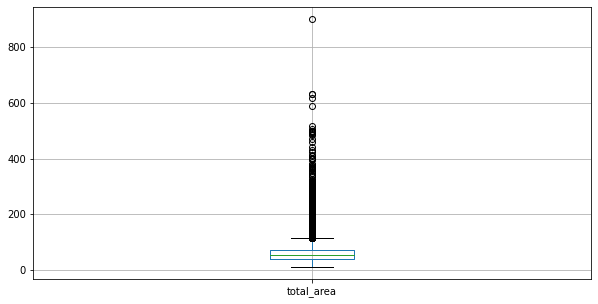

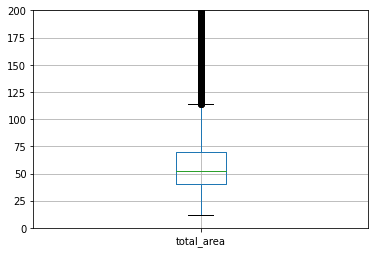

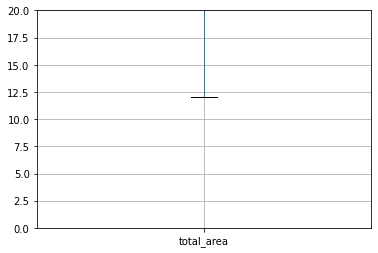

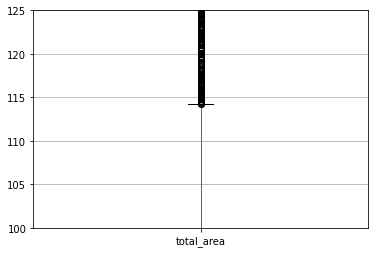

In [254]:
data.boxplot(column='total_area', figsize=(10,5))
plt.show()
plt.ylim(0, 200)
data.boxplot(column='total_area', figsize=(10,5)) # total_area <= 114.5
plt.show()
plt.ylim(0, 20)
data.boxplot(column='total_area', figsize=(10,5)) # total_area <= 114.5
plt.show()
plt.ylim(100, 125)
data.boxplot(column='total_area', figsize=(10,5)) # total_area <= 114.5
plt.show()


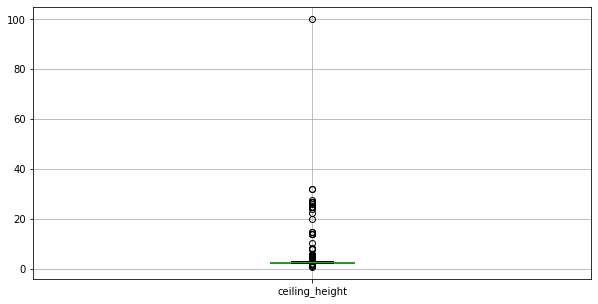

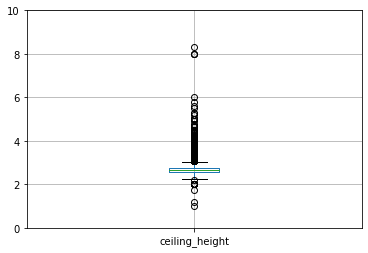

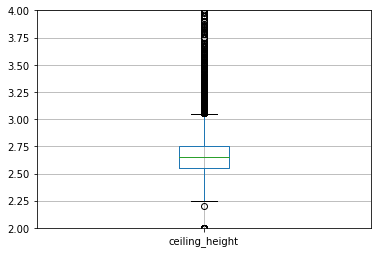

In [255]:
data.boxplot(column='ceiling_height', figsize=(10,5))
plt.show()
plt.ylim(0, 10)
data.boxplot(column='ceiling_height', figsize=(10,5))
plt.show()
plt.ylim(2, 4)
data.boxplot(column='ceiling_height', figsize=(10,5))
plt.show()

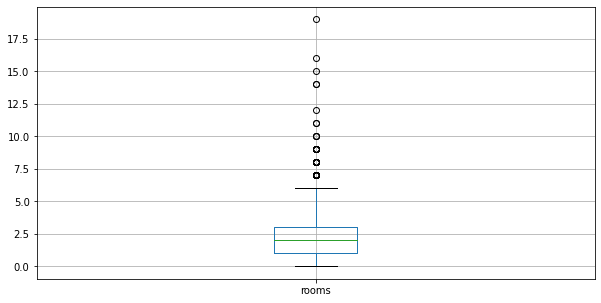

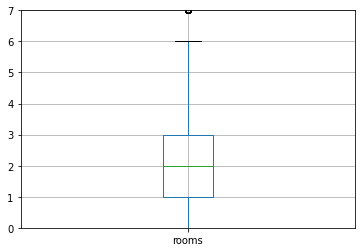

In [256]:
data.boxplot(column='rooms', figsize=(10,5))
plt.show()
plt.ylim(0,7)
data.boxplot(column='rooms', figsize=(10,5))
plt.show()

In [257]:
total_first = np.percentile(data['total_area'], [75 ,25])[1]
total_last = np.percentile(data['total_area'], [75 ,25])[0]
rooms_first = np.percentile(data['rooms'], [75 ,25])[1]
rooms_last =  np.percentile(data['rooms'], [75 ,25])[0]
height_first = np.percentile(data['ceiling_height'], [75 ,25])[1]
height_last = np.percentile(data['ceiling_height'], [75 ,25])[0]

In [258]:
good_data = data.query('(@total_first <= total_area <=@total_last) and (@rooms_first<=rooms <=@rooms_last) and (@height_first<= ceiling_height <= @height_last)')
print(good_data['total_area'].describe())
print(good_data['rooms'].describe())
print(good_data['ceiling_height'].describe())

count    6858.000000
mean       52.376066
std         8.556552
min        40.000000
25%        44.700000
50%        52.000000
75%        60.000000
max        69.700000
Name: total_area, dtype: float64
count    6858.000000
mean        1.934092
std         0.651247
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: rooms, dtype: float64
count    6858.000000
mean        2.640152
std         0.068062
min         2.550000
25%         2.600000
50%         2.635000
75%         2.700000
max         2.750000
Name: ceiling_height, dtype: float64


In [259]:
data =  data.query('( 11 <= total_area <= 113) and rooms < 7 and (2.25 <= ceiling_height <=3.15 )')
print(data['total_area'].describe())
print(data['rooms'].describe())
print(data['ceiling_height'].describe())

count    21484.000000
mean        53.558899
std         18.750942
min         12.000000
25%         39.000000
50%         50.000000
75%         64.300000
max        113.000000
Name: total_area, dtype: float64
count    21484.000000
mean         1.924828
std          0.886355
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64
count    21484.000000
mean         2.663234
std          0.152726
min          2.250000
25%          2.550000
50%          2.640000
75%          2.750000
max          3.150000
Name: ceiling_height, dtype: float64


Выше я сравнила два способа удаления аномальных значений: 1) при помощи квантилей, 2) при помощи диаграммы "ящик с усами". Можно заметить, что квантили "обрезают" больше данных, например, удаляются все квартиры, имеющие больше 3 комнат, хотя таких достаточно много. Следовательно, оптимальным способом удаления выбросов является ручная обработка при помощи диаграммы "ящик с усами". 

Очистим 'locality_name' от неявных дубликатов среди субъектов:

In [260]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True) #заменяем ё на е
duplicates = ['поселок', 'поселок городского типа', 'поселок городского типа', 'городской поселок', 'поселок станции', 'поселок при железнодорожной станции'] #заменяем различные вариации "поселков" на "поселок"
name = 'поселок'
for wrong_value in duplicates:
    data['locality_name']=data['locality_name'].str.replace(wrong_value, name)

In [261]:
data['price_per_meter'] = data['last_price']/data['total_area']
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
def floor_location(row):
    if row['floor'] == 1: 
        return 'Первый'
    if row['floor'] == row['floors_total']: 
        return 'Последний'
    else: 
        return 'Другой'

data['floor_location'] = data.apply(floor_location, axis=1)
data['distance_to_center'] = (data['cityCenters_nearest'] / 1000).apply(lambda x: round(x, 0))

### Проведите исследовательский анализ данных

Чтобы исследовать каждый выбранный параметр, выведем с помощью функции их описание с помощью desсribe() и построим две гистограммы: 1) гистограмма по необработанным данным, 2) гистограмма с учетом выбросов по интерквартильному размаху

In [262]:
def data_display(data, param, title):
    inf = data[param].describe()
    print(inf)
    lim1 = inf['25%'] - 3 * (inf['75%'] - inf['25%'])
    lim2 = inf['25%'] + 5 * (inf['75%'] - inf['25%'])
    if lim1 < 0: lim1 = 0 
    data[param].plot(kind='hist', bins=30, grid=True, title=f'{title}_orig', figsize=(10,5), legend=True)
    plt.show()
    data[param].plot(kind='hist', bins=30, range=(lim1, lim2), grid=True, title=f'{title}_filtered', figsize=(10,5), legend=True)
    plt.show()

# total_area #

count    21484.000000
mean        53.558899
std         18.750942
min         12.000000
25%         39.000000
50%         50.000000
75%         64.300000
max        113.000000
Name: total_area, dtype: float64


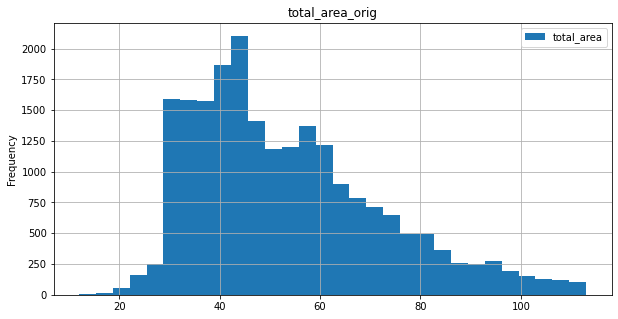

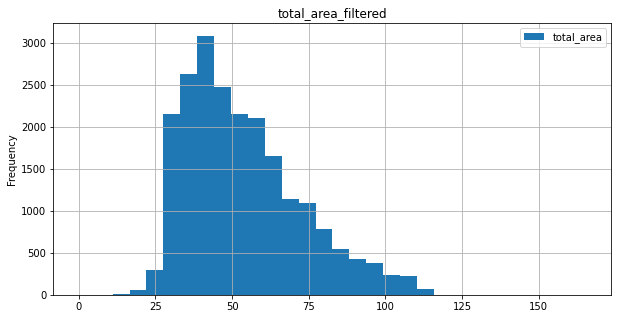

None


In [263]:
print(data_display(data, 'total_area','total_area'))

Вывод: можно заметить, что, несмотря на правостороннюю асимметрию, распределение значений общей площади близко к нормальному, на что указывает примерно одинаковые показатели центра распределения (медиана и средняя арифметическая) ~ 50 кв.м. Большая часть значений концентрируется в диапазоне от 20 до 115 кв.м.

# living_area

count    21484.000000
mean        30.563739
std         12.958835
min          2.000000
25%         18.100000
50%         29.400000
75%         39.600000
max         93.000000
Name: living_area, dtype: float64


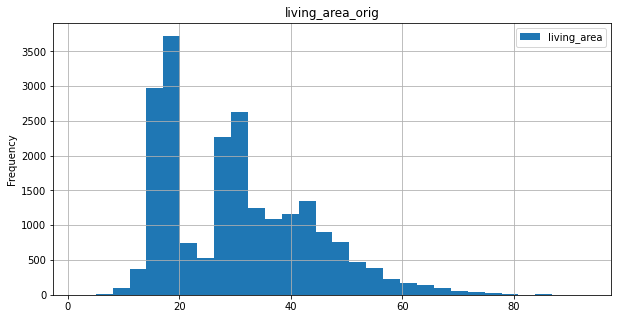

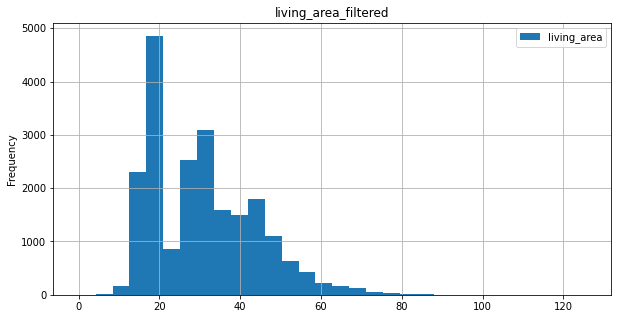

None


In [264]:
print(data_display(data, 'living_area','living_area'))

Вывод: медиана и средняя арифметическая снова примерно равны друг другу ~ 30 кв.м. Большая часть значений находятся в диапазоне от 10 до 70 кв.м.

# kitchen_area

count    21484.000000
mean         9.662093
std          4.097009
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         55.700000
Name: kitchen_area, dtype: float64


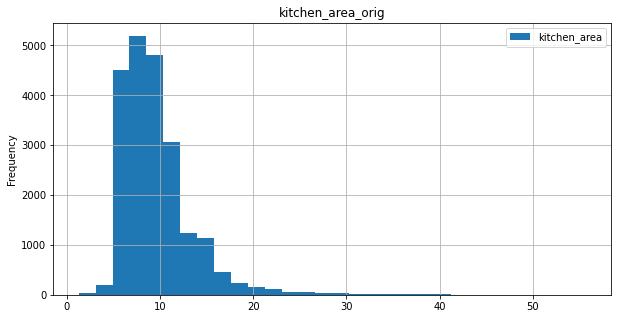

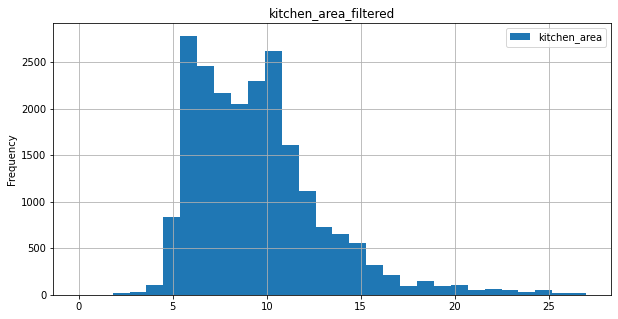

None


In [265]:
print(data_display(data, 'kitchen_area','kitchen_area'))

Вывод: медиана и средняя арифметическая снова примерно равны друг другу ~ 9 кв.м. Большая часть значений находятся в диапазоне от 4 до 20 кв.м. При этом можно заметить, что значения, находящиеся выше третьего квартиля, распределены в широком диапазоне: от 11 до 55 кв. м., что показывает большой разброс значений исследуемого показателя, среди которых много выбросов. 

# last_price

count    2.148400e+04
mean     5.159113e+06
std      3.181214e+06
min      1.219000e+04
25%      3.304380e+06
50%      4.450000e+06
75%      6.100000e+06
max      5.300000e+07
Name: last_price, dtype: float64


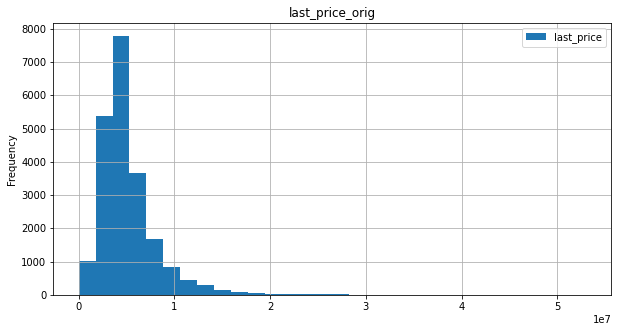

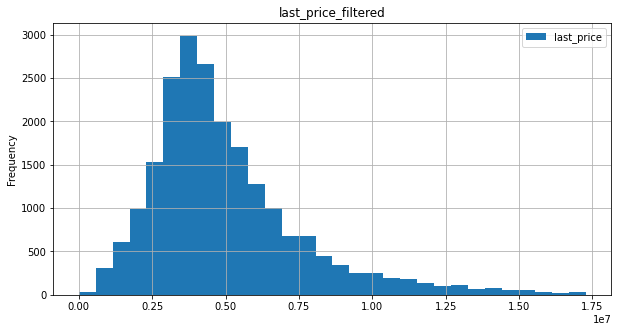

None
Недвижимость ценой более 6 млн: 25.34%


In [266]:
print(data_display(data, 'last_price','last_price'))
print('Недвижимость ценой более 6 млн: {:.2%}'.format(data.query('last_price > 6000000')['last_price'].count() / len(data)))

Вывод: медиана (4.450000e+06) и средняя арифметическая (5.159113e+06) отличаются, что говорит о большом размахе значений. При этом сильной асимметрии не наблюдается, распределение похоже на нормальное. Большая часть значений находятся в диапазоне от 1 до 6 млн.руб. При этом почти четверть значений распределены в большом ценовом диапазоне от 6 до 50 млн.руб.

# rooms

count    21484.000000
mean         1.924828
std          0.886355
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


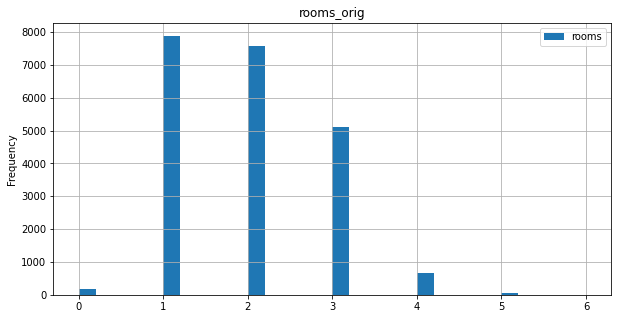

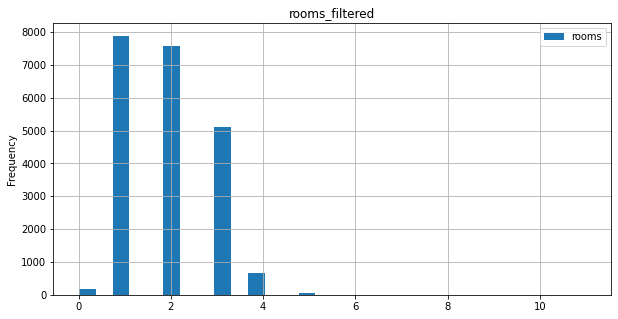

None


In [267]:
print(data_display(data, 'rooms','rooms'))

Вывод: медиана и средняя арифметическая снова равны друг другу ~ 2 комнаты. Наибольшая часть значений находятся в диапазоне от 1 до 3 комнат, распределение нормальное, аномальных значений нет.

# ceiling_height

count    21484.000000
mean         2.663234
std          0.152726
min          2.250000
25%          2.550000
50%          2.640000
75%          2.750000
max          3.150000
Name: ceiling_height, dtype: float64


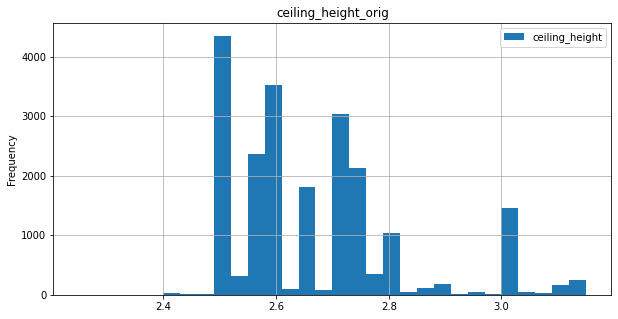

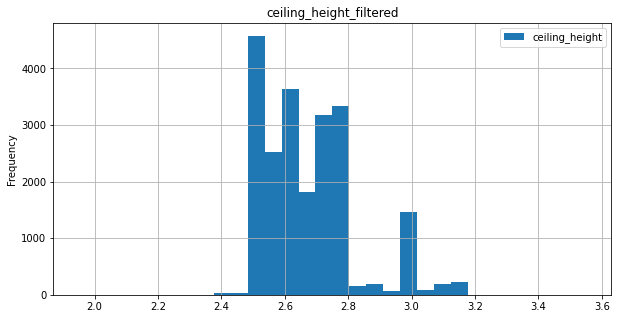

None


In [268]:
print(data_display(data, 'ceiling_height','ceiling_height'))


Вывод: распределение нормальное, медиана и средняя арифметическая почти равны друг другу ~ 2,6 метров. Варьирование высоты крайне невелико, большинство значений распределены в диапазоне от 2,5 до 2,7 метров. Визуально наблюдается правосторонняя асимметрия с концентрацией показателя в значении 2,5 метрах, при этом максимальнйо величиной является 3 метра. 

# floor

count    21484.000000
mean         5.994740
std          4.940065
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


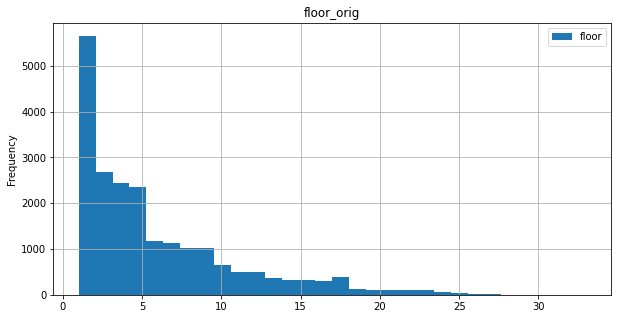

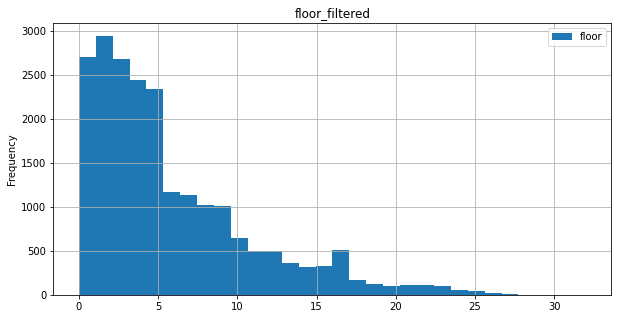

None


In [269]:
print(data_display(data, 'floor','floor'))

Вывод: медиана (5) и средняя арифметическая(~6) отличаются, но незначительно (в соотношении с максимальным значением показателя). Большинство значений распределены в диапазоне от 2 до 8 этажей, хотя четверть значений распределена в большом диапазоне от 8 до 33 этажей. Визуально наблюдается правосторонняя асимметрия, что вполне соответствует действительности, так как большинство многоэтажек имеют высоту от 2 до 8 этажей, но встречаются и более высокие здания. Именно поэтому при фильтрации данных эти значения не были выброшены как аномальные.

# cityCenters_nearest 

count    21484.000000
mean     14494.535212
std       7292.309410
min        318.000000
25%      11753.000000
50%      13096.500000
75%      15531.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


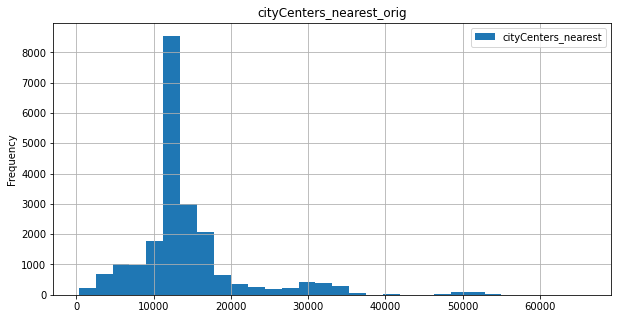

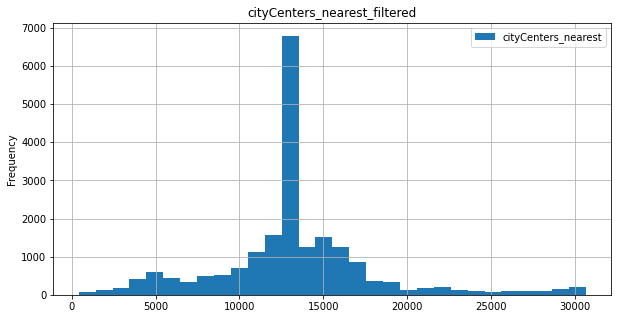

None


In [270]:
print(data_display(data, 'cityCenters_nearest','cityCenters_nearest')) 

Вывод: гистограмма имеет ярко выраженный пик в центре распределения (без отчетливой асимметрии), большинство квартир находятся на примерно одинаковом расстоянии от центра города: от 12 до 15 тыс. метров, при этом диапазон значений, как и ожидалось, очень велик, встречаются аномальные значения показателя: от 30 до 65 тыс. метров.

# airports_nearest

count    21484.000000
mean     28466.521179
std      11289.449706
min          0.000000
25%      20848.000000
50%      26757.000000
75%      35006.500000
max      84869.000000
Name: airports_nearest, dtype: float64


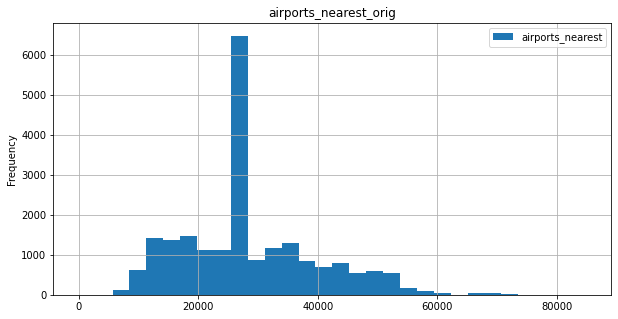

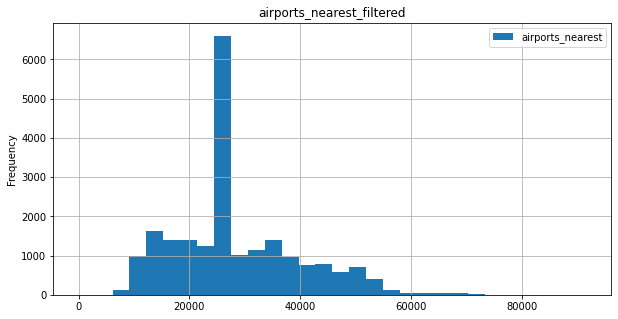

None


In [271]:
print(data_display(data, 'airports_nearest','airports_nearest')) 

Вывод: гистограмма имеет ярко выраженный пик в центре распределения (без отчетливой асимметрии) - примерно в 28 тыс. метров. Большинство значений концентрируется в диапазоне от 10 до 55 тыс. метров.

# parks_nearest

count    6692.000000
mean      499.635087
std       345.372045
min         1.000000
25%       296.000000
50%       460.000000
75%       620.000000
max      3190.000000
Name: parks_nearest, dtype: float64


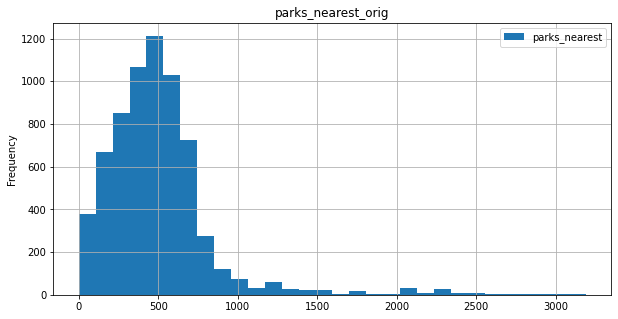

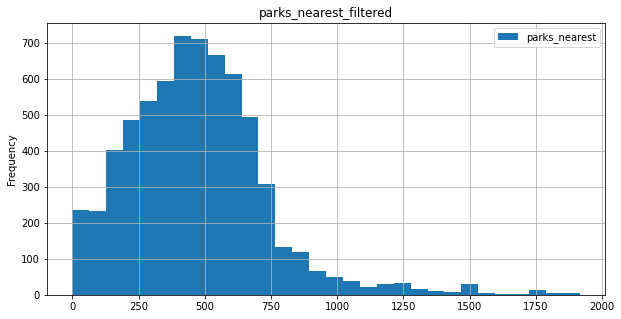

None


In [272]:
print(data_display(data, 'parks_nearest','parks_nearest')) 

Вывод: гистограмма по показателю расстояния до ближайшего парка имеет распределение. близкое к нормальному (распределение Пуассона), о чем свидетельствуют относительная близость значений медианы (479) и среднего арифметического (519.195183). В то же время заметен "хвост" значений в большом разбросе: от ~ 1000 до максимального значения признака - 2984. Для картографических данных это нормально, так как, хотя большинство квартир имеют парки на примерно одинаковом расстоянии, некоторые расположены далеко от различных рекреациионных объектов. 

# weekday

count    21484.000000
mean         2.575033
std          1.795976
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


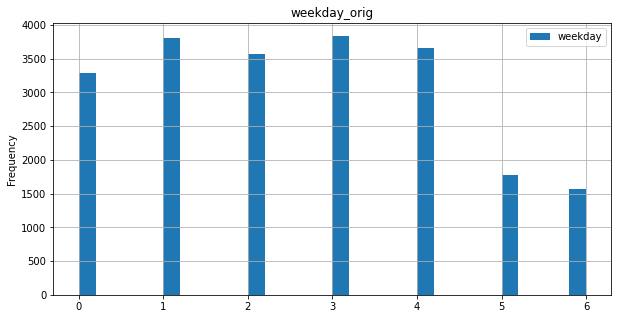

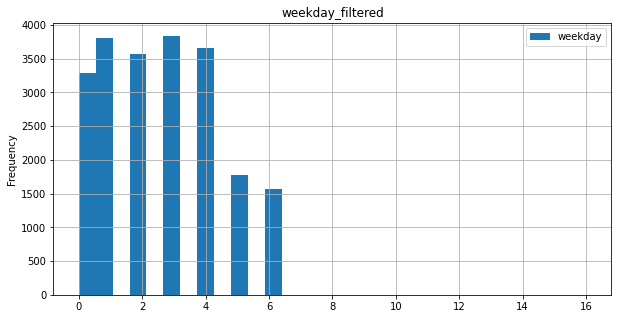

None


In [273]:
print(data_display(data, 'weekday','weekday'))

Вывод: чаще объявления о продаже недвижимости публикуют в будние дни, а не в выходные. Самым "популярным" днем публикации объявлений является четверг, самым "непопулярным" - воскресенье

# month

count    21484.000000
mean         6.394480
std          3.491325
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


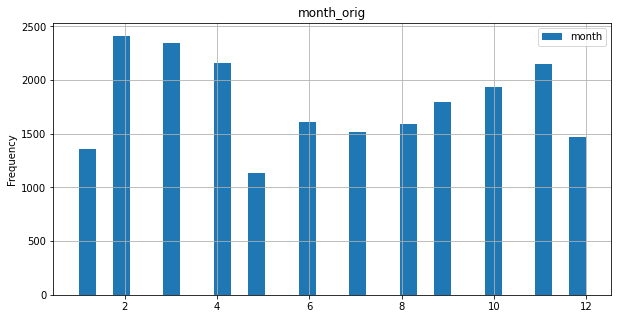

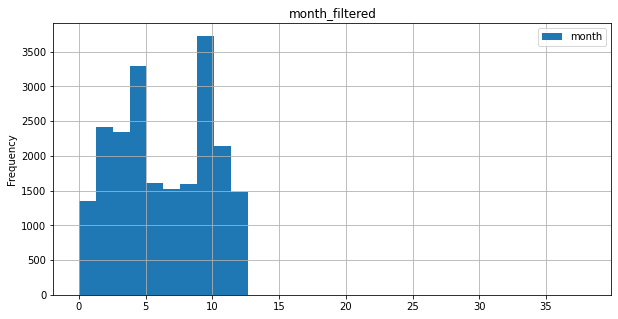

None


In [274]:
print(data_display(data, 'month','month'))

Вывод: чаще всего квартиры продают в конце зимы - начале весны, реже всего - летом. Возможно, так происходит потому, что летом люди чаще всего берут отпуск, поэтому не занимаются продажей недвижимости в это время. Зимой же (после новогодних праздников) и в начале весны в отпуск уходят крайне редко.

# Изучение скорости продажи квартир

count    18807.000000
mean       172.736587
std        211.150015
min          1.000000
25%         44.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64


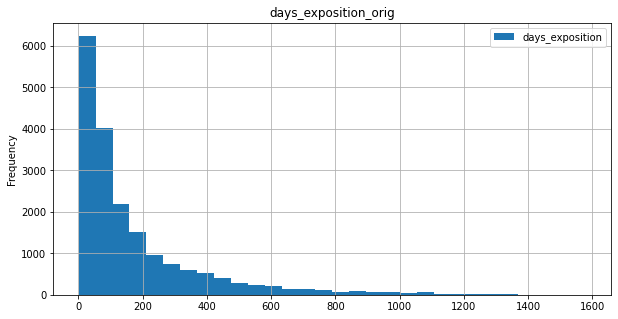

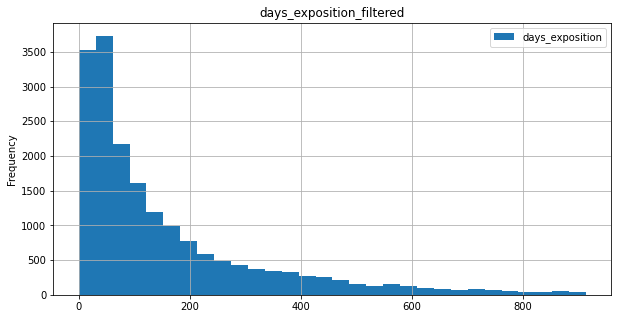

None


In [275]:
print(data_display(data, 'days_exposition','days_exposition'))

Гистограмма времени продажи квартиры имеет ярко выраженный пик и правостороннюю асимметрию, поэтому среднее значение (171) больше медианного (90) почти в 2 раза. Большинство квартир продаются достаточно быстро по сравнению с максимальным временем продажи (1580 дней). Опираясь на квартили, можно сказать, что квартира продалась быстро, если сделка закрылась за 43 дня и меньше. И, наоборот, долго, если объявление было создано больше, чем 216 дней назад. 

# Факторы, влияющие на общую стоимость объекта

Для подготовки данных и построения графиков корреляции создадим функцию:

In [276]:
def price_corr(data, param, style, title):
    data.pivot_table(index=param, values='last_price', aggfunc='median').plot(grid=True, style=style, title=title, figsize=(10, 5))
    try:
        print('Коэффициент корреляции Пирсона:', data['last_price'].corr(data[param]))
    except:
        print('price_relation: Коэффициент корреляции Пирсона вычислить нельзя из-за разных измерений сравниваемых величин')
    

Теперь перейдем к рассмотрению корреляции для каждого параметра:

# total_area

Коэффициент корреляции Пирсона: 0.6857037456235915
None
Коэффициент корреляции Пирсона: 0.6857037456235915
None


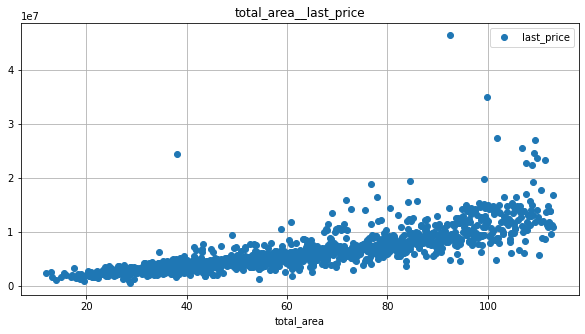

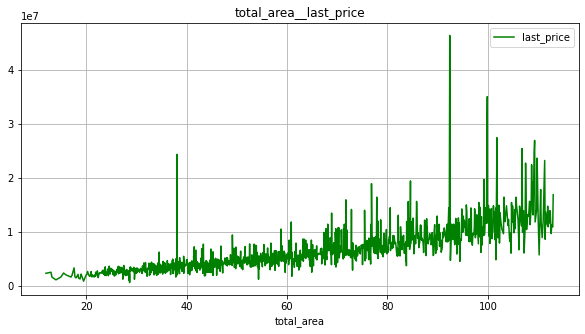

In [277]:
print(price_corr(data, 'total_area', 'o', 'total_area__last_price'))
print(price_corr(data, 'total_area', 'g', 'total_area__last_price'))

Вывод: коэффициент корреляции и графики указывают на наличие зависимости между исследуемыми показателями: чем больше размер общей площади квартиры, тем выше ее цена. В левой части точечной диаграммы наблюдается скопление точек, что указывает на небольшой разброс цены для квартир маленьких размеров (к тому же, таких объектов достаточно много), в то время как в правой части графика разброс сильно увеличивается. Это означает, что для больших по площади квартир цена может сильно коррелировать и с другими факторами. Можно заметить два выброса, один из которых (квартира площадью 100 кв.м.) объясняется площадью, а другой (квартира площадью около 40 кв. м.) пока объяснить сложно. 

Коэффициент корреляции Пирсона: 0.5507050570381706
None
Коэффициент корреляции Пирсона: 0.5507050570381706
None


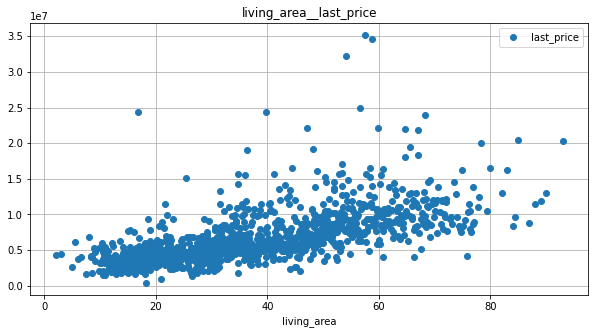

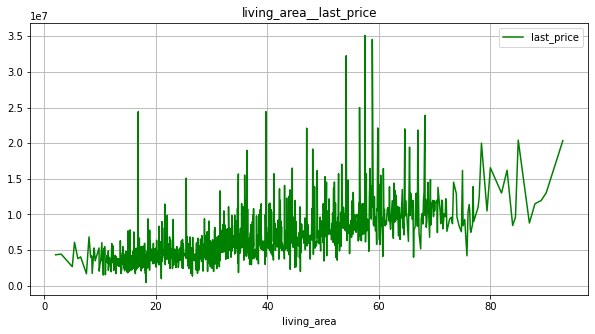

In [278]:
print(price_corr(data, 'living_area', 'o', 'living_area__last_price'))
print(price_corr(data, 'living_area', 'g', 'living_area__last_price'))

Вывод: коэффициент корреляции в данном случае меньше, чем при вычислении корреляции между показателями общей площади и цены. Соответственно, выбросов тоже больше. Наблюдается та же тенденция касательно увеличения размеров жилой площади: чем больше значение, тем больше разброс значений цены. При этом начиная с площади в 60 кв. м. разброс цен уменьшается, начиная с примерно 70 кв.м. количество объектов уменьшается, поэтому данные теряют репрезентативность. Примечательным является тот факт, что квартиры с площадью от 50 до 60 кв. м., судя по линейному графику, могут иметь большие цены, чем квартиры с большей площадью. Этот факт подтверждается не слишком большим (~55%) обобщающим показателем корреляции исследуемых параметров. 

Коэффициент корреляции Пирсона: 0.5323505012854736
None
Коэффициент корреляции Пирсона: 0.5323505012854736
None


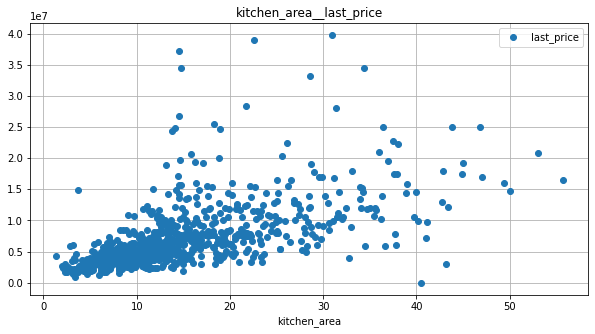

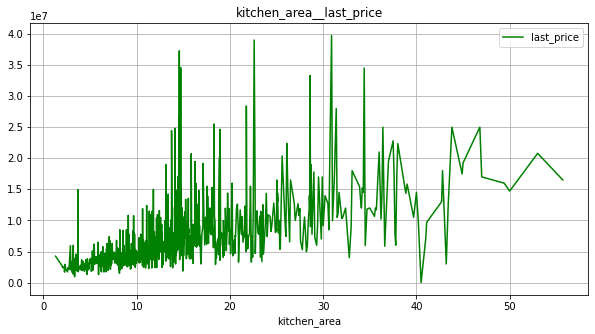

In [279]:
print(price_corr(data, 'kitchen_area', 'o', 'kitchen_area__last_price'))
print(price_corr(data, 'kitchen_area', 'g', 'kitchen_area__last_price'))

Вывод: наблюдаются те же тенденции, что и при анализе корреляций между ценой и общей площадью или жилой площадью. В данном случае большой разброс значений начинается примерно в 15 кв.м., хотя выбросы заметны на протяжении всего графика. Корреляция присутствует, но площадь кухни не является самодостаточным параметром для определения цены квартиры. Примечательно, что квартиры с большей площадью кухни (например, от 40 до 50 кв.м.) не имеют таких больших выбросов, как, например, квартиры с площадью от 10 до 30 кв.м. Конечно, это явление можно объяснить малым количеством квартир с площаью квартиры, большей чем 30 кв.м., но все же очевидно, что для пронозирования цены квартиры обязательно рассматривать и другие факторы.

# rooms

Коэффициент корреляции Пирсона: 0.3815986370825499
None


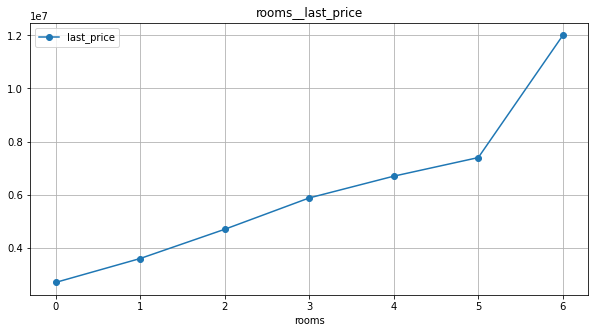

In [280]:
print(price_corr(data, 'rooms', 'o-', 'rooms__last_price'))

Вывод: несмотря на небольшой коэффицент корреляции, по линейному графику видно, что присутствует прямая зависимость: чем больше комнат в квартире, тем большее ее цена. При этом до 5 комнат наблюдается плавный рост цены, но если комнат 6, цена резко возрастает.

# floor_location

price_relation: Коэффициент корреляции Пирсона вычислить нельзя из-за разных измерений сравниваемых величин
None


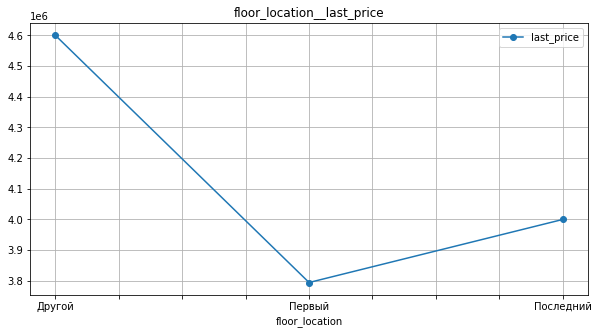

In [281]:
print(price_corr(data, 'floor_location', 'o-', 'floor_location__last_price'))

Вывод: самые низкие цены у квартир, находящихся на первом и последнем этажах, при этом квартиры, находящиеся на промежуточных этажах (категория "Другой"), имеют в разы большие цены.

# dates

Коэффициент корреляции Пирсона: -0.014571064617146114
None
Коэффициент корреляции Пирсона: -3.859975531606203e-05
None
Коэффициент корреляции Пирсона: -0.005718372219311145
None


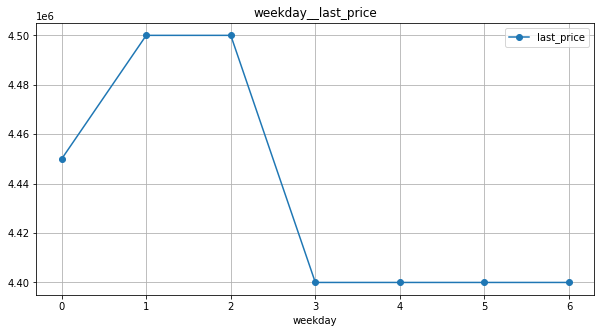

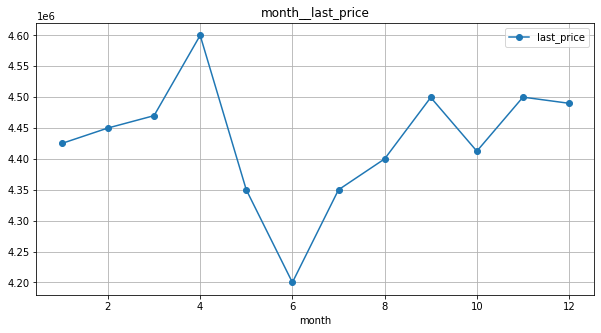

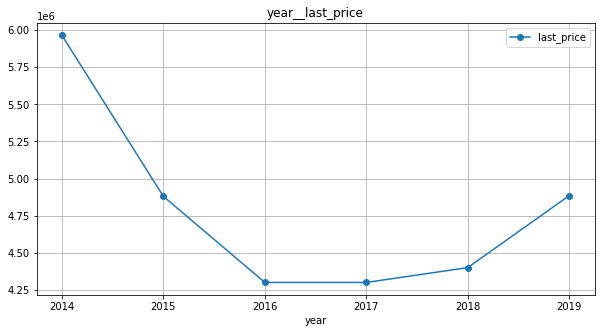

In [282]:
print(price_corr(data, 'weekday', 'o-', 'weekday__last_price'))
print(price_corr(data, 'month', 'o-', 'month__last_price'))
print(price_corr(data, 'year', 'o-', 'year__last_price'))

Вывод: для дней недели, месяцев и годов публикации объявления корреляция с ценой квартиры практически отсутствует, на что указывают коэффициенты, меньшие 1%, и представленные выше графики, в которых трудно обнаружить тенденцию.

# Общая статистика корреляции 

# Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

       locality_name  Количество объявлений  Средняя цена за квадратный метр
0    Санкт-Петербург                  13801                    109724.895201
4             Пушкин                    332                    101757.764593
8    деревня Кудрово                    298                     92409.726322
6  поселок Парголово                    326                     90332.263023
1     поселок Мурино                    550                     85603.644853
2     поселок Шушары                    435                     78555.374108
5            Колпино                    329                     75458.352318
7            Гатчина                    300                     68852.174140
3         Всеволожск                    391                     68627.823164
9             Выборг                    199                     57750.554286


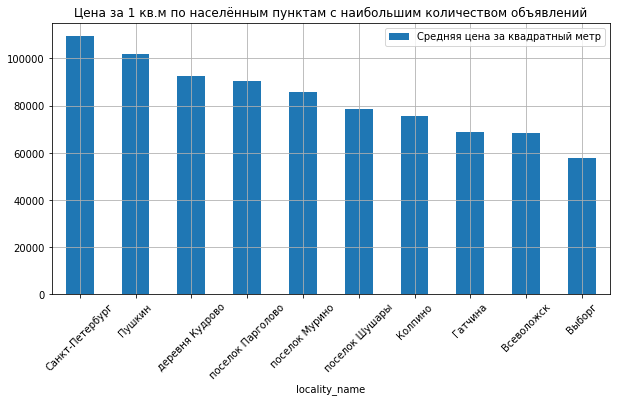

Регион с самой высокой ценой за квадратный метр: 0    Санкт-Петербург
Name: locality_name, dtype: object
Регион с самой низкой ценой за квадратный метр: 9    Выборг
Name: locality_name, dtype: object


In [284]:
price_per_meter_top10 = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count','mean']).sort_values(by=('count', 'price_per_meter'), ascending=False).head(10).reset_index()
price_per_meter_top10.columns = ['locality_name', 'Количество объявлений', 'Средняя цена за квадратный метр']
price_per_meter_top10.sort_values(by='Средняя цена за квадратный метр', ascending=False, inplace=True)
print(price_per_meter_top10)
price_per_meter_top10.plot(kind='bar', x='locality_name', y='Средняя цена за квадратный метр', grid=True, title='Цена за 1 кв.м по населённым пунктам с наибольшим количеством объявлений', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()
print('Регион с самой высокой ценой за квадратный метр:', price_per_meter_top10.sort_values(by='Средняя цена за квадратный метр', ascending=False).head(1)['locality_name'])
print('Регион с самой низкой ценой за квадратный метр:', price_per_meter_top10.sort_values(by='Средняя цена за квадратный метр', ascending=True).head(1)['locality_name'])

# Средняя цена каждого километра в Санкт-Петербурге

                    last_price
distance_to_center            
0.0                    7200000
1.0                    8500000
2.0                    8495000
3.0                    7500000
4.0                    7700000
5.0                    8000000
6.0                    7450000
7.0                    6750000
8.0                    6639250
9.0                    5100000
10.0                   4900000
11.0                   4950000
12.0                   4900000
13.0                   5150000
14.0                   4800000
15.0                   4800000
16.0                   4740000
17.0                   4550000
18.0                   4250000
19.0                   4500000
20.0                   5525000
21.0                   5254738
22.0                   4892500
23.0                   4400000
24.0                   3480000
25.0                   3900000
26.0                   3347500
27.0                   8300000
28.0                   4990000
29.0                   4535000
Коэффици

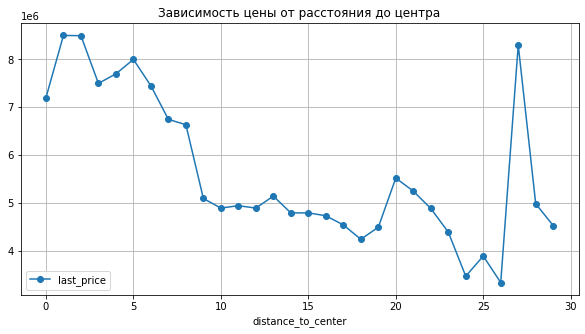

In [285]:
spb_data = data.query('locality_name == "Санкт-Петербург"') #извлекаем данные по Санкт-Петербургу
print(spb_data.pivot_table(index='distance_to_center', values='last_price', aggfunc='median'))
price_corr(spb_data, 'distance_to_center', 'o-', 'Зависимость цены от расстояния до центра') #зависимость цены от расстояния до центра


Вывод: абсолютной корреляции не наблюдается, но прослеживается (хоть и не полностью стабильная) обратная зависимость между расстоянием от центра до объекта недвижимости и ценой объекта. Можно заметить, что после ~ 8 километров стоимость перестает так же сильно коррелировать с расстоянием до центра города. Предположительно, резкий скачок в точке ~ 8 километров указывает на то, что именно это расстояние ограничивает квартиры, находящиеся в центре, от квартир, наъодящихся за его пределами.

### Общий вывод

# Основные параметры исследуемых показателей:
- В среднем площадь объектов составляет ~50 кв.м. Большая часть значений концентрируется в диапазоне от 20 до 115 кв.м.
- Масштаб жилой площади в среднем составляет ~ 30 кв.м. Большая часть значений находятся в диапазоне от 10 до 70 кв.м.
- Масштаб кухни в среднем составляет ~ 9 кв.м. Большая часть значений находятся в диапазоне от 4 до 20 кв.м. При этом можно заметить, что значения, находящиеся выше третьего квартиля, распределены в широком диапазоне: от 11 до 55 кв. м., что показывает большой разброс значений исследуемого показателя, среди которых много выбросов.
- Средняя стоимость квартиры: 5159113 млн, медиана: ~4.5 млн. Большая часть значений находятся в диапазоне от 1 до 6 млн.руб. При этом почти четверть значений распределены в большом ценовом диапазоне от 6 до 50 млн.руб.
- Чаще всего в квартире 2 комнаты. Большинство объектов имеют от 1 до 3 комнат, при этом имеются объекты с 6 комнатами.
- Среднее значение высоты потолка: ~ 2,6 метров. Варьирование высоты крайне невелико, большинство значений распределены в диапазоне от 2,5 до 2,7 метров, при этом максимальнйо величиной является 3 метра.
- Большинство квартир расположены на 5 или 6 этаже. Значения распределены в диапазоне от 2 до 8 этажей, хотя четверть значений распределена в большом диапазоне от 8 до 33 этажей - так происходит потому, что большая часть многоэтажных зданий имеют высоту от 2 до 8 этажей, но встречаются и более высокие здания.
- Чаще всего квартиры находятся на расстоянии от 12 до 15 тыс. метров от центра города, при этом диапазон значений, как и ожидалось, очень велик, встречаются аномальные значения показателя: от 30 до 65 тыс. метров. Таким образом, большинство квартир в массиве данных не расположены в центральной части города.
- Большая часть объектов находятся на расстоянии 28 тыс. метров от аэропорта. Наблюдается концентрация в диапазоне от 10 до 55 тыс. метров. Таким образом, квартиры в основном находятся на не слишком большом расстоянии от аэропорта.
- Хотя в основном квартиры расположены на расстоянии около 500 м до ближайшего парка, есть объекты, ближайший парк для которых расположен на расстоянии от 1000 до 2984 метров.
- Чаще объявления о продаже недвижимости публикуют в будние дни, а не в выходные. Самым "популярным" днем публикации объявлений является четверг, самым "непопулярным" - воскресенье
- Чаще всего квартиры продают в конце зимы - начале весны, реже всего - летом. Возможно, так происходит потому, что летом люди чаще всего берут отпуск, поэтому не занимаются продажей недвижимости в это время. Зимой же (после новогодних праздников) и в начале весны в отпуск уходят крайне редко.
# Изучение скорости продажи квартир
Большинство квартир продаются достаточно быстро (~90-171 дней) по сравнению с максимальным временем продажи (1580 дней). Можно сделать вывод, что квартира продалась быстро, если сделка закрылась за 43 дня и меньше. И, наоборот, долго, если объявление было создано больше, чем 216 дней назад.
# Факторы, влияющие на общую стоимость объекта
- Коэффициент корреляции ( ~69% ) и графики указывают на наличие сильной зависимости между ценой объекта и его площадью: чем больше размер общей площади квартиры, тем выше ее цена. Для больших по площади квартир цена может сильно коррелировать и с другими факторами, а для малых по площади объектов общая площадь является ведущим параметром при определении цены.
- Rоэффициент корреляции между стоимостью и жилой площадью квартиры меньше ( ~55% ), чем при вычислении корреляции между показателями общей площади и цены. Наблюдается та же тенденция касательно увеличения размеров жилой площади: чем больше значение, тем больше разброс значений цены. При этом начиная с площади в 60 кв. м. разброс цен уменьшается, начиная с примерно 70 кв.м. количество объектов уменьшается, поэтому данные теряют репрезентативность. Примечательным является тот факт, что квартиры с площадью от 50 до 60 кв. м. могут иметь большие цены, чем квартиры с большей площадью. Этот факт подтверждается не слишком большим обобщающим показателем корреляции исследуемых параметров.
- При анализе связи между площадью кухни и стоимостью объекта наблюдаются те же тенденции, что и при анализе корреляций между ценой и общей площадью или жилой площадью. В данном случае большой разброс значений начинается примерно в 15 кв.м. Корреляция присутствует, но площадь кухни не является самодостаточным параметром для определения цены квартиры. Примечательно, что квартиры с большей площадью кухни (например, от 40 до 50 кв.м.) не имеют таких больших выбросов, как, например, квартиры с площадью от 10 до 30 кв.м. Конечно, это явление можно объяснить малым количеством квартир с площаью квартиры, большей чем 30 кв.м., но все же очевидно, что для пронозирования цены квартиры обязательно рассматривать и другие факторы.
- Между количеством комнат и стоимостью объекта присутствует прямая зависимость: чем больше комнат в квартире, тем большее ее цена. При этом до 5 комнат наблюдается плавный рост цены, но если комнат 6, цена резко возрастает.
- Самые низкие цены ( ~ 4 ) у квартир, находящихся на первом и последнем этажах, при этом квартиры, находящиеся на промежуточных этажах, имеют относительно большие цены ( ~ 4.6 ).
- Корреляция между временем публикации объявления и ценой объекта отсутствует.
#  Стоимость на недвижимость в популярных населённых пунктах
Регионом с самой высокой стоимостью на недвижимость среди отобранных субъектов является Санкт-Петербург, с самой низкой стоимостью - Выборг.
# Средняя цена каждого километра в Санкт-Петербурге
Абсолютной корреляции не наблюдается, но прослеживается (хоть и не полностью стабильная) обратная зависимость между расстоянием от центра до объекта недвижимости и ценой объекта. Можно заметить, что после ~ 8 километров стоимость перестает так же сильно коррелировать с расстоянием до центра города. Предположительно, резкий скачок в точке ~ 8 километров указывает на то, что именно это расстояние ограничивает квартиры, находящиеся в центре, от квартир, наъодящихся за его пределами.
# Выводы по корреляциям
После исключения аномальных значений для параметров количества комнат, общей площади и высоты потолка мы выяснили, что в основном для всех параметров наблюдается распределение, приближенное к нормальному. Наиболее выраженные пики визуально наблюдались для параметров цены и дистанций до различных объектов (аэропорта, центра города, парка, прудов), что говорит о том, что большинство квартир, во-первых, попадают в один достаточно узкий ценовой диапазон, а, во-вторых, имеют приблизительно одинаковое расстояние до объектов исследуемого набора. 
Также было выяснено, что в среднем квартиры продаются в течение 43-216 дней.
На общую стоимость объекта сильнее всего влияют интерьерные характеристики квартиры (общая площадь, площадь жилой части, кухни), слабее зависимость между ценой квартиры и количеством комнат, но корреляция все же присутствует. Также объекты, находящиеся на первом и последнем этажах дома, стоят куда дешевле, чем квартиры, располагающиеся на "промежуточных" этажах.
Среди субъектов с наибольшим количеством объявлений мы выявили регионы с наибольшей и наименьшими ценами на жилье: Санкт-Петербург и Выборг соответственно.
Для данных по Санкт-Петербургу мы выявили корреляцию (хоть и не очень значительную) между дистанцией до центра города и стоимостью объекта недвижимости: чем меньше расстояние, тем больше цена. Эта зависимость сильнее всего проявляется для квартир, расположенных в предположительном центре города. 
Таким образом, при прогнозировании стоимости квартиры стоит в основном опираться на следующие параметры:
- Не зависимые от расположения и других внешних факторов характеристики квартиры, такие как общая площадь, площадь кухни и жилая площадь
- Расстояние до центра города, в зависимости от расположения квартиры, как было описано выше